# TSNE comparison OpenTSNE vs TSNE-cuda

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [18]:
import openTSNE
import tsnecuda
import corc.complex_datasets
import matplotlib.pyplot as plt


In [8]:
perplexity=30

In [14]:
X,y = corc.complex_datasets.load_densired(dim=8, path="../../datasets/densired.npz")

In [ ]:
cpu_tsne = openTSNE.TSNE(
    random_state=42,
    n_components=2,
    perplexity=perplexity,
    metric="euclidean",
    initialization="random", # default: pca
    learning_rate=200.0, # default: auto which would set it higher
    early_exaggeration_iter=250, # corresponds to force_magnify_iters
    early_exaggeration=12.0, # default also sets this
    neighbors="auto", # "exact" for N<1000 and "approx" otherwise
    n_iter=500,
    # exaggeration=None,
    dof=1,
    theta=0.5,
    n_interpolation_points=3,
    min_num_intervals=50,
    ints_in_interval=1,
    metric_params=None,
    initial_momentum=0.8,
    final_momentum=0.8,
    max_grad_norm=None,
    max_step_norm=5,
    n_jobs=16,
    negative_gradient_method="auto",
    verbose=False,
)
gpu_tsne = tsnecuda.TSNE(
    random_seed=42,
    n_components=2,
    perplexity=perplexity,
    metric='euclidean',
    init='random', # only random is implemented
    early_exaggeration=12.0,
    learning_rate=200.0,
    num_neighbors=32, # unclear what this is about
    force_magnify_iters=250,
    pre_momentum=0.8, # default 0.5
    post_momentum=0.8,
    theta=0.5,
    epssq=0.0025, # unclear
    n_iter=500,
    n_iter_without_progress=1000,
    min_grad_norm=0.0,
    perplexity_epsilon=1e-3, # unclear
    return_style='once',
    num_snapshots=5,
    verbose=0,
    print_interval=10,
    device=0,
    magnitude_factor=5,
)

In [29]:
cpu_fit = cpu_tsne.fit(X)

In [31]:
gpu_fit = gpu_tsne.fit_transform(X)

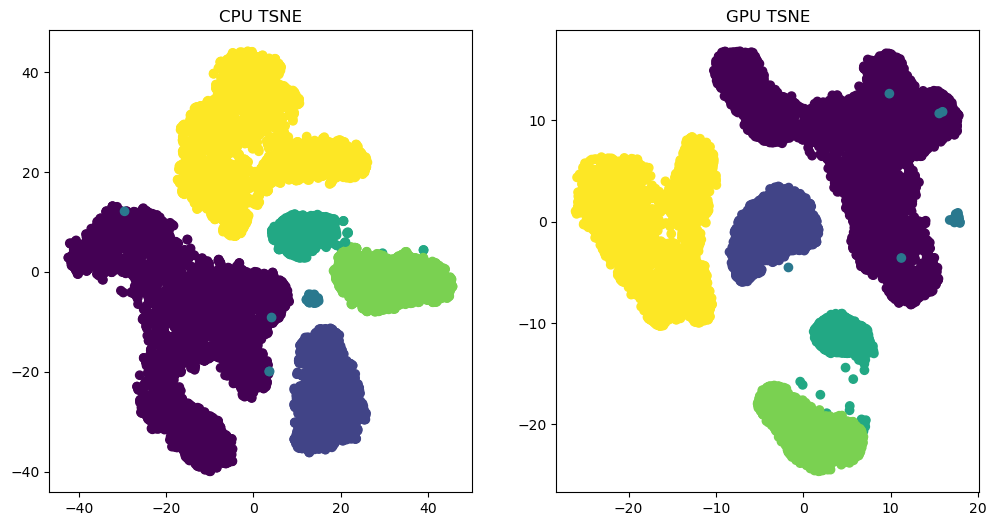

In [32]:

# assuming 'labels' is your target variable
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(cpu_fit[:, 0], cpu_fit[:, 1], c=y)
axs[0].set_title('CPU TSNE')

axs[1].scatter(gpu_fit[:, 0], gpu_fit[:, 1], c=y)
axs[1].set_title('GPU TSNE')

plt.show()